# Webscraping - Flipkart

### Install requests and beautiful soup library

In [1]:
%pip install requests bs4

Note: you may need to restart the kernel to use updated packages.


### Restart and run all cells

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import requests
from bs4 import BeautifulSoup

In [8]:
url = "https://www.opindia.com/latest-news/?nocache"
data = requests.get(url)
data

<Response [200]>

### If respnsonse is 200 then it is ok

<!DOCTYPE html >

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Today's Latest English News Reports from India | Archives of OpIndia</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<link href="https://www.opindia.com/latest-news/?nocache" rel="canonical"/><link href="https://www.opindia.com/latest-news/page/2/?nocache" rel="next"/><link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." name="description"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Today's Latest English News Reports from India | Arc
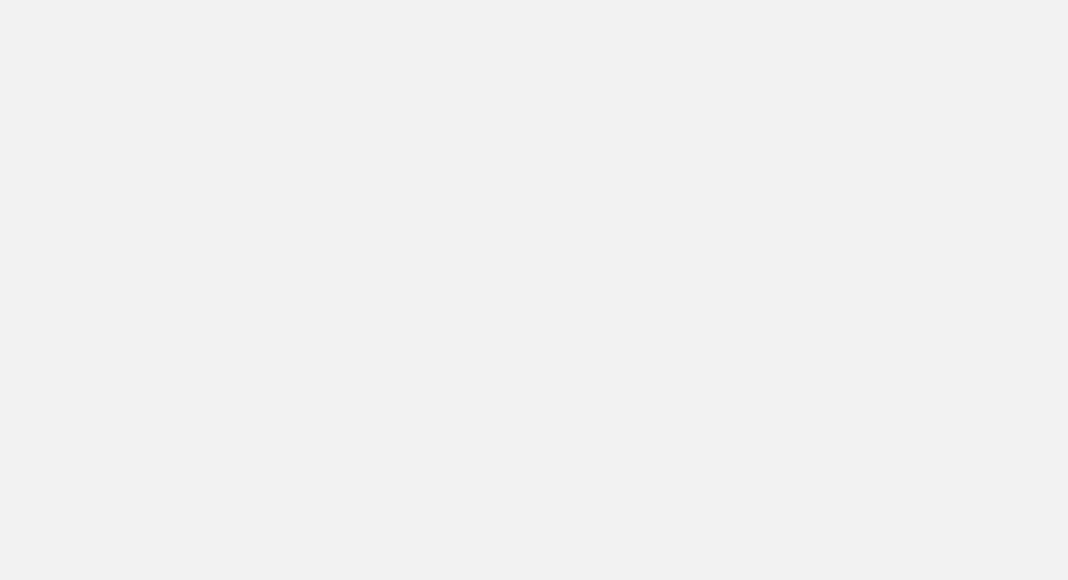

In [11]:
bs = BeautifulSoup(data.content)
bs

In [12]:
headings = bs.find_all('h3', class_="entry-title td-module-title")
headings

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10/new-karnataka-education-policy-yogendra-yadav-professor-japhet-who-drafted-anti-superstition-target-hindu-rituals-committee/" rel="bookmark" title="New Karnataka education policy: Yogendra Yadav, the protestor for hire, and Professor Japhet, who drafted anti-superstition bill specifically targeting Hindu rituals, part of committee">New Karnataka education policy: Yogendra Yadav, the protestor for hire, and Professor Japhet, who drafted anti-superstition bill specifically targeting Hindu rituals, part of committee</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10/iuml-rahul-gandhi-called-secular-extends-support-to-palestine-even-after-hamas-beheads-and-rapes-israelis/" rel="bookmark" title="IUML, which Rahul Gandhi called secular, extends support to Palestine even after Hamas beheads and rapes Israelis ">IUML, which Rahul Gandhi called secular, extends support to P

### Getting the urls for specific news articles

In [15]:
headings[0].find('a').get('href')

'https://www.opindia.com/2023/10/new-karnataka-education-policy-yogendra-yadav-professor-japhet-who-drafted-anti-superstition-target-hindu-rituals-committee/'

### Create a function to fetch all new article urls

In [16]:
def get_news_urls(url):
    data = requests.get(url)
    bs = BeautifulSoup(data.content)
    headings = bs.find_all('h3',class_="entry-title td-module-title")
    links = []
    for i in headings:
        s = i.find('a').get('href')
        links.append(s)
    return links

In [17]:
url

'https://www.opindia.com/latest-news/?nocache'

In [18]:
links = get_news_urls(url)

In [19]:
links

['https://www.opindia.com/2023/10/new-karnataka-education-policy-yogendra-yadav-professor-japhet-who-drafted-anti-superstition-target-hindu-rituals-committee/',
 'https://www.opindia.com/2023/10/iuml-rahul-gandhi-called-secular-extends-support-to-palestine-even-after-hamas-beheads-and-rapes-israelis/',
 'https://www.opindia.com/2023/10/hindu-forum-canada-expresses-solidarity-with-canadian-jewish-groups-stage-protests-against-hamas/',
 'https://www.opindia.com/2023/10/ed-takes-possession-15-benami-properties-of-dmk-a-raja/',
 'https://www.opindia.com/2023/10/rahul-gandhi-election-promise-to-madhya-pradesh-is-caste-census/',
 'https://www.opindia.com/2023/10/ccommon-enemy-how-the-ummah-ignores-millions-of-muslim-victims-but-gets-together-against-jews-hindus-and-christians/',
 'https://www.opindia.com/2023/10/the-hindu-creating-north-south-divide-repeatedly-lying-devolution-of-funds-misinformation/',
 'https://www.opindia.com/2023/10/pm-modi-telangana-speeches-kcr-nda-tribal-university-po

In [20]:
len(links)

104

### For url fetch the news headings

In [22]:
links[0]

'https://www.opindia.com/2023/10/new-karnataka-education-policy-yogendra-yadav-professor-japhet-who-drafted-anti-superstition-target-hindu-rituals-committee/'

In [23]:
data2 = requests.get(links[0])
data2

<Response [200]>

In [25]:
bs2 = BeautifulSoup(data2.content)

In [28]:
h = bs2.find('h1', class_="tdb-title-text").text
h

'New Karnataka education policy: Yogendra Yadav, the protestor for hire, and Professor Japhet, who drafted anti-superstition bill specifically targeting Hindu rituals, part of committee'

In [30]:
t = bs2.find('time', class_="entry-date updated td-module-date").text
t

'12 October, 2023 '

In [32]:
content = bs2.find_all('p')
content

[<p>It is notable that the "Duggal Sahab" of political activism, Yogendra Yadav had admitted last year that the farmers' protest in which he took the avatar of a 'farmer leader' was a "political stunt" meant to oust BJP from power.</p>,
 <p>On Wednesday (11th October), the Congress government in Karnataka <a href="https://www.ndtv.com/education/karnataka-government-sets-up-committee-to-formulate-state-education-policy-4473708" rel="noreferrer noopener" target="_blank">constituted</a> a committee of ‘experts’ to formulate the Karnataka State Education Policy which would replace the National Education Policy (NEP). </p>,
 <p>The state government has issued a ‘Government Order’ (GO) forming a 15-member committee headed by Professor and former Delhi UGC Chairman Sukhdev Thorat, with a secondary group of eight subject experts/advisers rendering expert input. The committee will submit its report on February 28 next year.</p>,
 <p>“The government is pleased to accord sanction to the State Edu

In [34]:
content[0].text

'It is notable that the "Duggal Sahab" of political activism, Yogendra Yadav had admitted last year that the farmers\' protest in which he took the avatar of a \'farmer leader\' was a "political stunt" meant to oust BJP from power.'

In [35]:
news = ""
for i in content:
    news = news + i.text

In [37]:
print(news)

It is notable that the "Duggal Sahab" of political activism, Yogendra Yadav had admitted last year that the farmers' protest in which he took the avatar of a 'farmer leader' was a "political stunt" meant to oust BJP from power.On Wednesday (11th October), the Congress government in Karnataka constituted a committee of ‘experts’ to formulate the Karnataka State Education Policy which would replace the National Education Policy (NEP). The state government has issued a ‘Government Order’ (GO) forming a 15-member committee headed by Professor and former Delhi UGC Chairman Sukhdev Thorat, with a secondary group of eight subject experts/advisers rendering expert input. The committee will submit its report on February 28 next year.“The government is pleased to accord sanction to the State Education Policy Commission for the preparation of a draft Karnataka State Education Policy under the chairmanship of Professor Sukhdev Thorat, an eminent Educationist. Economist, Professor, Writer and Forme

In [38]:
def get_news_details(url):
    data2 = requests.get(url)
    bs2 = BeautifulSoup(data2.content)
    h = bs2.find('h1', class_="tdb-title-text").text
    t = bs2.find('time', class_="entry-date updated td-module-date").text
    cont = bs2.find_all('p')
    news = ""
    for i in cont:
        news = news + i.text
    return h, t, news

In [39]:
links[0]

'https://www.opindia.com/2023/10/new-karnataka-education-policy-yogendra-yadav-professor-japhet-who-drafted-anti-superstition-target-hindu-rituals-committee/'

In [41]:
h, t, news = get_news_details(links[0])

In [42]:
h

'New Karnataka education policy: Yogendra Yadav, the protestor for hire, and Professor Japhet, who drafted anti-superstition bill specifically targeting Hindu rituals, part of committee'

In [43]:
t

'12 October, 2023 '

In [44]:
news

'It is notable that the "Duggal Sahab" of political activism, Yogendra Yadav had admitted last year that the farmers\' protest in which he took the avatar of a \'farmer leader\' was a "political stunt" meant to oust BJP from power.On Wednesday (11th October), the Congress government in Karnataka constituted a committee of ‘experts’ to formulate the Karnataka State Education Policy which would replace the National Education Policy (NEP). The state government has issued a ‘Government Order’ (GO) forming a 15-member committee headed by Professor and former Delhi UGC Chairman Sukhdev Thorat, with a secondary group of eight\xa0subject experts/advisers rendering expert input. The committee will submit its report on February 28 next year.“The government is pleased to accord sanction to the State Education Policy Commission for the preparation of a draft Karnataka State Education Policy under the chairmanship of Professor Sukhdev Thorat, an eminent Educationist. Economist, Professor, Writer an

### Saving all the data into dataframe

In [45]:
import pandas as pd
def get_news_dataframe(url):
    # Get news links
    links = get_news_urls(url)
    date = []
    title = []
    article = []
    # Get News Details
    for i in links:
        h, t, news = get_news_details(i)
        title.append(h)
        date.append(t)
        article.append(news)
    # Create a dictionary
    dct = {'Date':date,
           'Heading':title,
           'News':article,
           'url':links}
    # Create a dataframe
    df = pd.DataFrame(dct)
    return df

In [46]:
url

'https://www.opindia.com/latest-news/?nocache'

In [47]:
df = get_news_dataframe(url)
df

,Date,Heading,News,url
0,"12 October, 2023",New Karnataka education policy: Yogendra Yadav...,"It is notable that the ""Duggal Sahab"" of polit...",https://www.opindia.com/2023/10/new-karnataka-...
1,"11 October, 2023","IUML, which Rahul Gandhi called secular, exten...","Notably, while the Indian Union Muslim League ...",https://www.opindia.com/2023/10/iuml-rahul-gan...
2,"11 October, 2023",Hindu Forum Canada joins forces with Canadian ...,The Hindu Forum Canada released a statement co...,https://www.opindia.com/2023/10/hindu-forum-ca...
3,"10 October, 2023",ED seizes 15 benami properties of DMK MP and f...,The ED informed regarding the seizure of the 1...,https://www.opindia.com/2023/10/ed-takes-posse...
4,"10 October, 2023",Rahul Gandhi’s election promise to Madhya Prad...,"""In BJP's laboratory, the dead are treated and...",https://www.opindia.com/2023/10/rahul-gandhi-e...
...,...,...,...,...
99,"11 October, 2023",BLM celebrates paragliding Hamas terrorists wh...,Chairman and Chief Technology Officer of X Elo...,https://www.opindia.com/2023/10/blm-supports-h...
100,"11 October, 2023",Mohammad Deif masterminded Hamas terror attack...,Mohammad Deif has been involved in terror acti...,https://www.opindia.com/2023/10/mohammad-deif-...
101,"11 October, 2023",‘My daughter is alive in Gaza’: German woman S...,A family friend said that Shani Louk seriously...,https://www.opindia.com/2023/10/german-woman-p...
102,"11 October, 2023",The New York Times publishes a report calling ...,There is no mention in the NYT report that Ham...,https://www.opindia.com/2023/10/the-new-york-t...


### Save this to csv file

In [48]:
df.to_csv('OpindiaNews.csv')